# 找參數關係 (Exploratory Data Analysis)

* 看分佈
* 看相關係數
* 看數值和數值的關係
* 看數值和類別的關係


In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize']=(5,5)


In [155]:
train = pd.read_csv("./house prices/train.csv")

##  看分佈 (用skew來看分佈是偏左偏右，如果常態的話會接近0)

skew = 1.880941


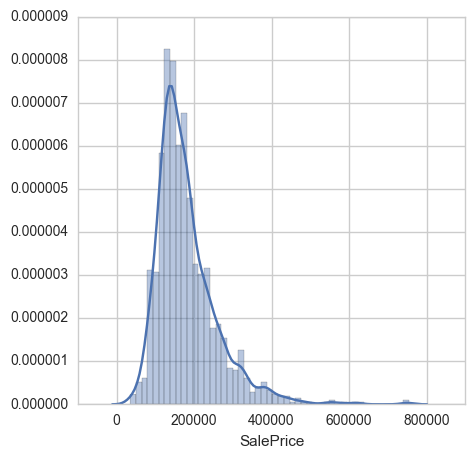

In [156]:
sns.distplot(train.SalePrice)

from scipy.stats import skew
print 'skew = %f' % (skew(train.SalePrice))

### 如果把y取log，轉成比較常態的資料，會對預測的performace比較好

price skew = 1.880941
log(price + 1) skew = 0.121222


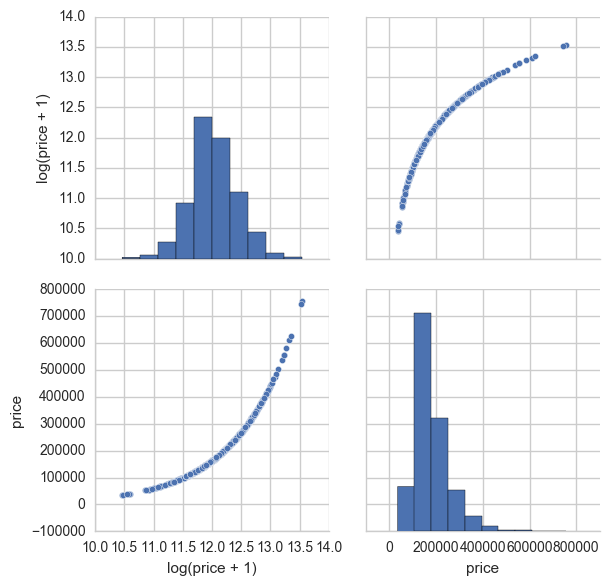

In [168]:
prices = pd.DataFrame({'price':train['SalePrice'], 'log(price + 1)':np.log1p(train['SalePrice'])})
sns.pairplot(prices, size=3)
print 'price skew = %f' % (skew(prices['price']))
print 'log(price + 1) skew = %f' % (skew(prices['log(price + 1)']))

## 看相關係數 (數值型)

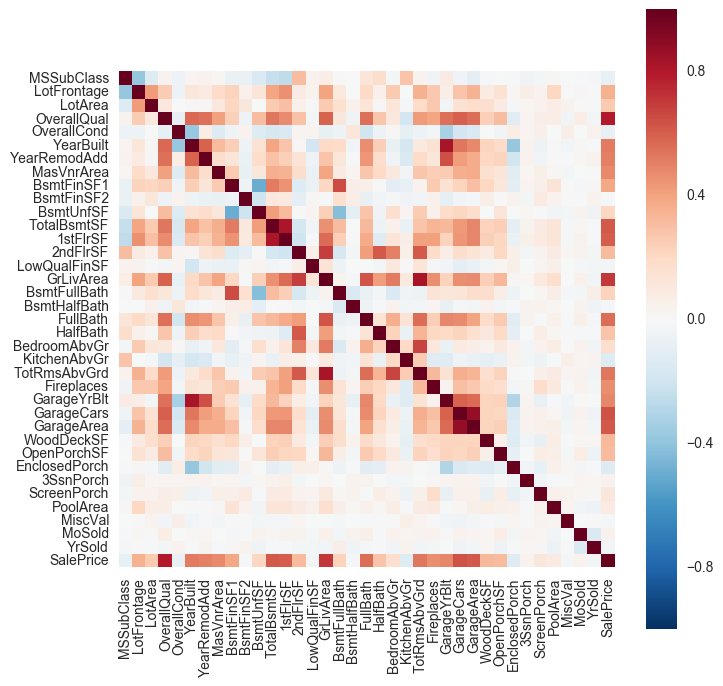

In [158]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[: ,1:].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmax=1, square=True)

### 依大小排序

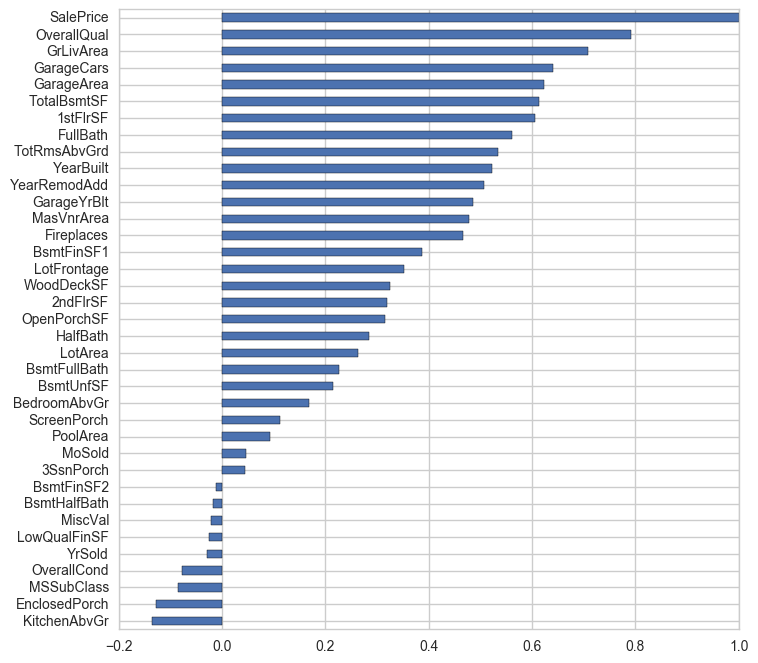

In [159]:
corr_SalePrice = corr['SalePrice']
sorted_corr_SalePrice = corr_SalePrice.sort_values()
plt.figure(figsize=(8,8))
sorted_corr_SalePrice.plot(kind='barh')

In [160]:
print sorted_corr_SalePrice

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64


## 看數值和數值的關係
### 相關係數從大到小，每3個參數跟SalePrice畫出來，看看關係 (同時畫太多參數不好看)

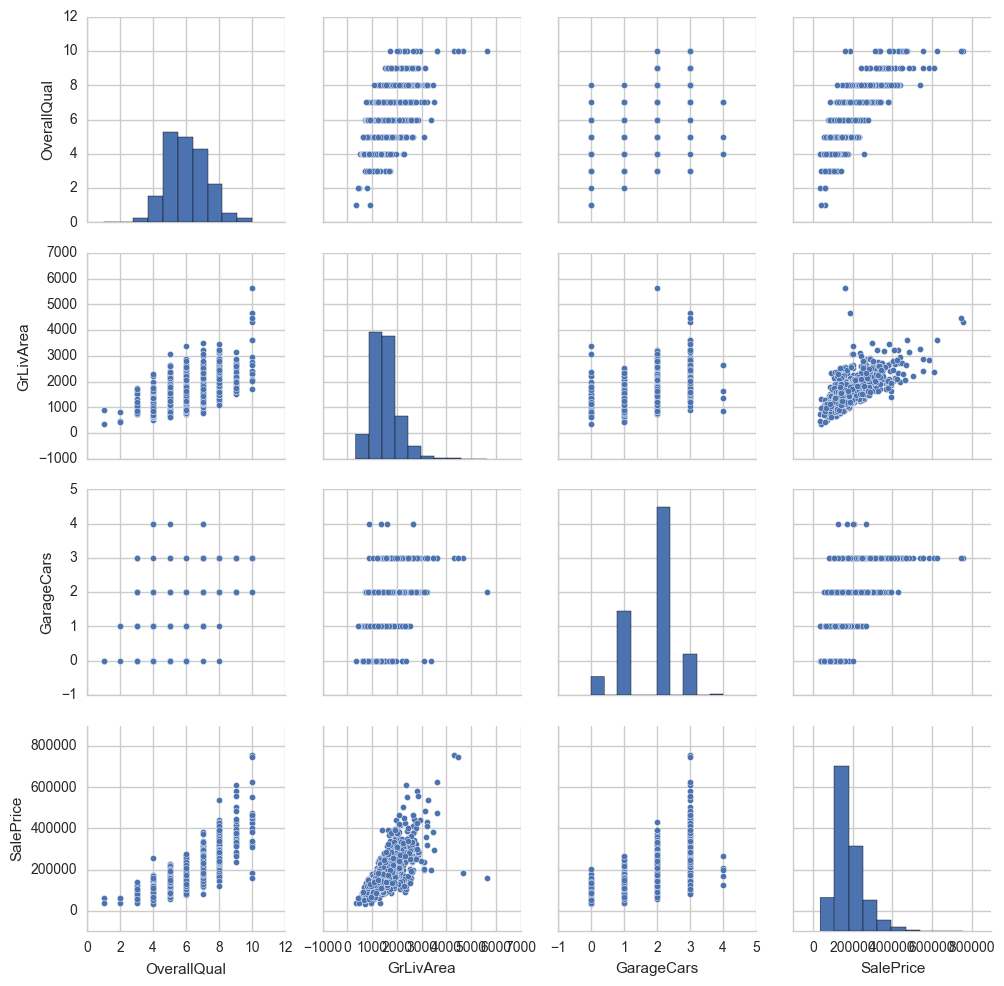

In [169]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']
sns.pairplot(train[cols])

## 看數值和類別的關係 (先用直覺想關係 如地段、地坪、房間數、屋況等等)

In [173]:
print train.select_dtypes(include=['object']).columns.values

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


### 1. 挑一個畫畫看 (Neighborhood, 房價與地段的關係)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

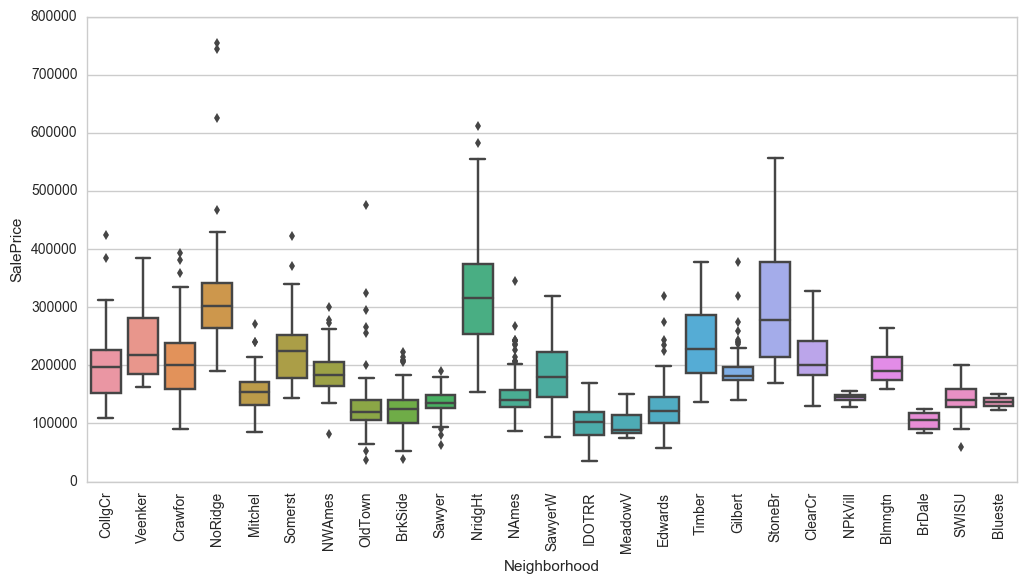

In [177]:
plt.figure(figsize = (12, 6))
sns.boxplot(x ='Neighborhood', y ='SalePrice', data=train)
plt.xticks(rotation=90)

In [185]:
print train['SalePrice'].groupby(train['Neighborhood']).median().sort_values()

Neighborhood
MeadowV     88000
IDOTRR     103000
BrDale     106000
OldTown    119000
Edwards    121750
BrkSide    124300
Sawyer     135000
Blueste    137500
SWISU      139500
NAmes      140000
NPkVill    146000
Mitchel    153500
SawyerW    179900
Gilbert    181000
NWAmes     182900
Blmngtn    191000
CollgCr    197200
ClearCr    200250
Crawfor    200624
Veenker    218000
Somerst    225500
Timber     228475
StoneBr    278000
NoRidge    301500
NridgHt    315000
Name: SalePrice, dtype: int64


### 手動將這些Neighborhood分成幾群後轉成數值 (直覺用房價來分，如高價、中價、低價)
### 從nominal -> ordinal -> discrete (從幾類到有大小關係)

In [187]:
neighborhood_map = {
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "NAmes" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
}
train['NeighborhoodBin'] = train['Neighborhood'].map(neighborhood_map)

0    2
1    3
2    2
3    3
4    4
Name: NeighborhoodBin, dtype: int64


### 或是另一個做法，就分兩類

In [196]:
train.loc[train.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
train.loc[train.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
train.loc[train.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
train.loc[train.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
train.loc[train.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
train["Neighborhood_Good"].fillna(0, inplace=True)

### 2.有沒有heating很重要嗎?

* Ames有些月份超冷的
* https://weather.com/weather/monthly/l/USIA0026:1:US

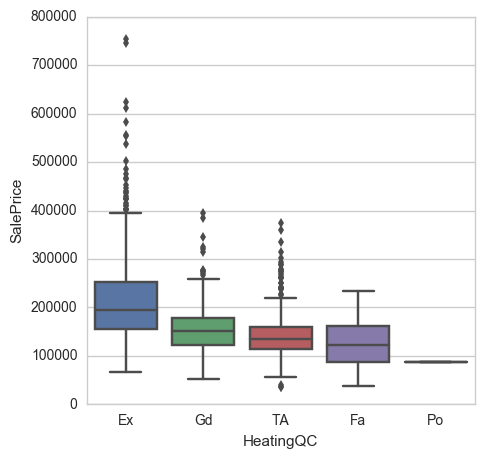

In [197]:
sns.boxplot(x ='HeatingQC', y ='SalePrice', data=train)

### 那如果還有中央空調呢?

* 有中央空調還有暖氣設備的房價很好

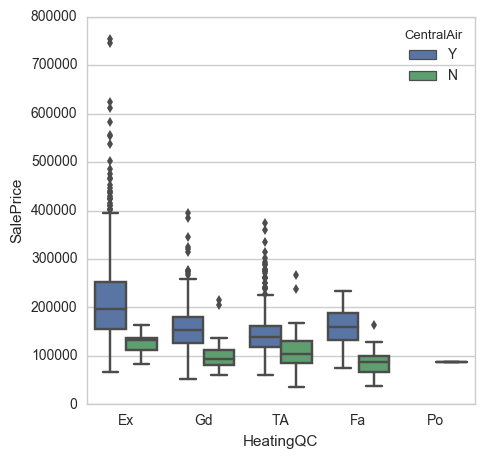

In [201]:
sns.boxplot(x ='HeatingQC', y ='SalePrice',  hue = 'CentralAir', data=train)

### 可以簡單分有沒有Heating就好

In [202]:
train["Heating_Good"] = train.HeatingQC.replace({'Ex': 1, 'Gd': 1, 'TA': 0, 'Fa': 0, 'Po': 0})

### 把Y/N轉成1/0

In [204]:
train["CentralAir"] = (train["CentralAir"] == "Y") * 1.0